In [1]:
from transformers import T5Model
import numpy as np
from sklearn.decomposition import PCA
from tqdm.notebook import tqdm

In [2]:
model = T5Model.from_pretrained('google/t5-large-lm-adapt')

In [3]:
weitghts = model.get_encoder().get_input_embeddings().weight.detach().clone().numpy()

In [4]:
def calc_loss(n_components, X):
    pca = PCA(n_components=n_components)
    pca.fit(X)
    reduced = pca.transform(X)
    reconstruct = np.dot(reduced, pca.components_) + pca.mean_
    loss = ((reconstruct - X) ** 2).mean()
    return loss

x = []
y = []
for n_components in tqdm(range(16, 1024, 16)):
    x.append(n_components)
    y.append(calc_loss(n_components, weitghts))

  0%|          | 0/63 [00:00<?, ?it/s]

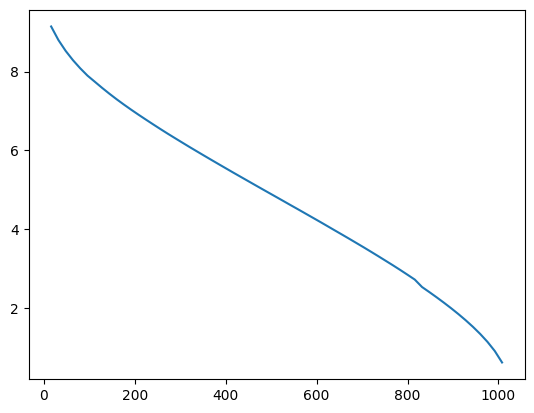

In [6]:
import matplotlib.pyplot as plt

plt.plot(x, np.sqrt(y))